In [12]:
!pip install tensorflow scikit-learn pandas matplotlib

In [8]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [11]:
data = pd.read_csv('personality_dataset.csv')


In [12]:
# Ma'lumotning birinchi 5 qatorini ko‘rish
print(data.head())

# NaN (bo'sh) qiymatlar bormi yoki yo‘qmi?
print(data.isnull().sum())


   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  
Time_spent_Alone             63
Stage_fear                   73
Social_event_atte

In [84]:
X = data.drop(['Personality'], axis=1)
y = data['Personality']


In [85]:
print(X.head())


   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency  
0                        No                 13.0             5.0  
1                       Yes                  0.0             3.0  
2                       Yes                  5.0             2.0  
3                        No                 14.0             8.0  
4                        No                  8.0             5.0  


In [58]:
# Butun X ni birinchi bosqichda to'g'rilaymiz (X_train va X_test oldidan!)
X = pd.get_dummies(X)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [61]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # input layer
    Dense(64, activation='relu'),      # 1-qatlam
    Dense(32, activation='relu'),      # 2-qatlam
    Dense(1, activation='sigmoid')     # chiqish qatlam (binary classification uchun)
])


In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(data['Personality'])  # 'Introvert' -> 0, 'Extrovert' -> 1


In [73]:
X = pd.get_dummies(X)  # bu qadamni o‘z joyida qoldiring

# Bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.6689
Test loss: 0.6694960594177246, Test accuracy: 1.0


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modelni o‘qitamiz
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Baholash
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7873 - loss: 0.6116 - val_accuracy: 1.0000 - val_loss: 0.3076
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.2276 - val_accuracy: 1.0000 - val_loss: 0.0704
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0504 - val_accuracy: 1.0000 - val_loss: 0.0199
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss:

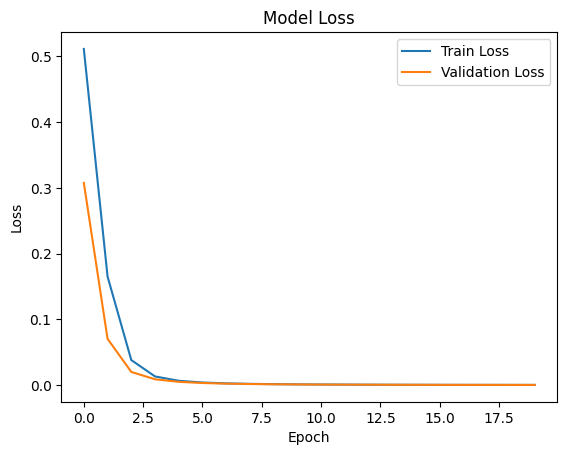

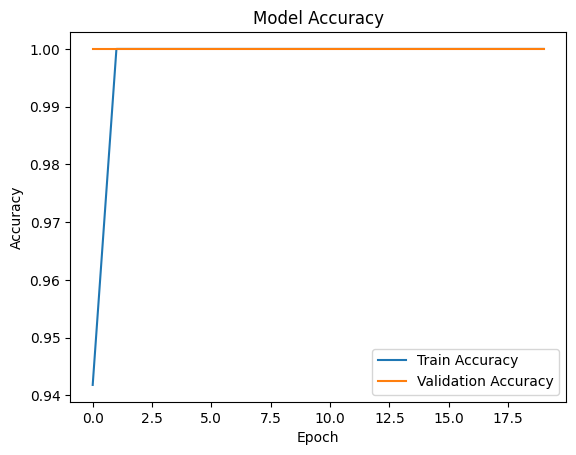

In [76]:
import matplotlib.pyplot as plt

# Yo'qotish grafigi
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Aniqlik grafigi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 1.0000 - loss: 0.6036 - val_accuracy: 1.0000 - val_loss: 0.4900
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.4533 - val_accuracy: 1.0000 - val_loss: 0.3490
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3160 - val_accuracy: 1.0000 - val_loss: 0.2292
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.2050 - val_accuracy: 1.0000 - val_loss: 0.1458
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.1310 - val_accuracy: 1.0000 - val_loss: 0.0943
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0852 - val_accuracy: 1.0000 - val_loss: 0.0635
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 0.0445
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0410 - val_accuracy: 1.0000 - val_los

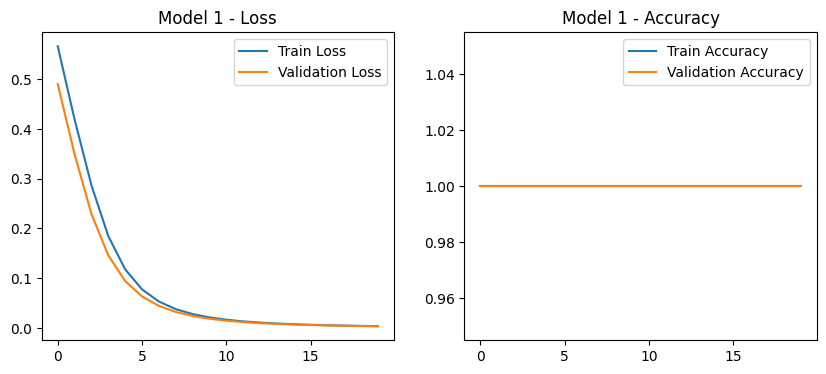

In [77]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss1, acc1 = model1.evaluate(X_test, y_test)
print(f"Model 1 - Accuracy: {acc1:.4f}, Loss: {loss1:.4f}")

# Graf
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model 1 - Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 - Accuracy')
plt.legend()
plt.show()

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7684 - loss: 0.6208 - val_accuracy: 1.0000 - val_loss: 0.3445
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.2638 - val_accuracy: 1.0000 - val_loss: 0.0883
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0643 - val_accuracy: 1.0000 - val_loss: 0.0250
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss:

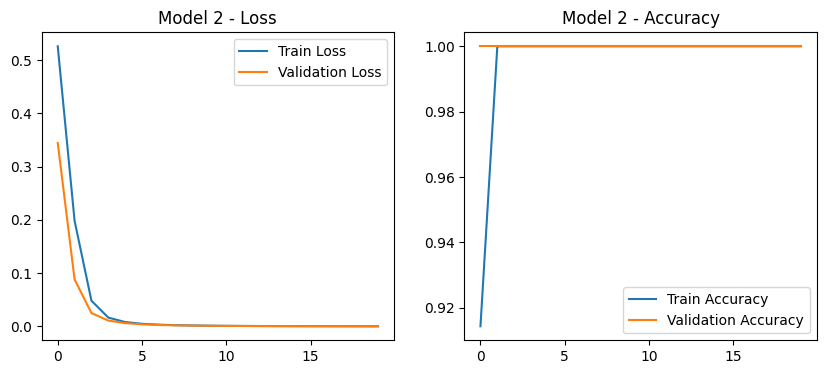

In [78]:
model2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss2, acc2 = model2.evaluate(X_test, y_test)
print(f"Model 2 - Accuracy: {acc2:.4f}, Loss: {loss2:.4f}")

# Graf
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 - Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 - Accuracy')
plt.legend()
plt.show()

In [86]:
# Modeldan predict qilish (Natija ehtimollik bo'ladi)
y_pred_prob = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [87]:
# Agar sigmoid chiqqan bo'lsa — ehtimollikni 0 yoki 1 ga aylantirish
y_pred = (y_pred_prob > 0.5).astype(int)


In [88]:
from sklearn.preprocessing import LabelEncoder

# Y_test string bo'lsa avval uni encoder qilamiz
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)


In [89]:
import pandas as pd

# Predicted labelni asl ko‘rinishga qaytaramiz (agar encoder ishlatilgan bo‘lsa)
y_pred_labels = encoder.inverse_transform(y_pred.reshape(-1))
y_test_labels = encoder.inverse_transform(y_test_encoded)

# DataFrame yaratamiz
result_df = pd.DataFrame({
    'True_Label': y_test_labels,
    'Predicted_Label': y_pred_labels
})

# Natijani ko‘rish
print(result_df.head())


   True_Label  Predicted_Label
0           1                1
1           0                0
2           1                1
3           1                1
4           1                1


In [90]:
wrong_predictions = result_df[result_df['True_Label'] != result_df['Predicted_Label']]
print("Noto‘g‘ri bashoratlar:")
print(wrong_predictions)


Noto‘g‘ri bashoratlar:
Empty DataFrame
Columns: [True_Label, Predicted_Label]
Index: []


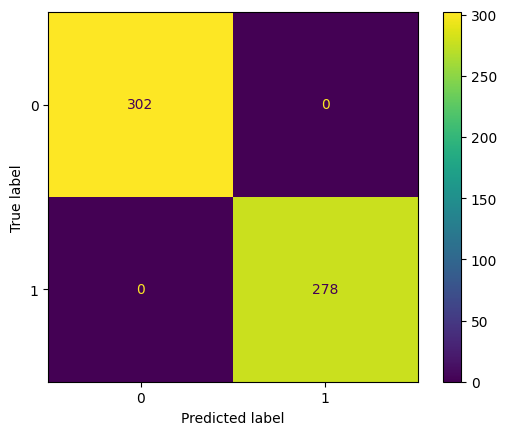

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Confusion matrixni olish
cm = confusion_matrix(y_test_encoded, y_pred)

# 2. Vizual qilish (grafik)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
